In [7]:
pip install cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67903 sha256=f97368cca8cfa2d285aa8b74bc74e8bfc81fead804ed90935ed4fadbe4e23df4
  Stored in directory: /Users/onuorahvictor/Library/Caches/pip/wheels/29/b4/f8/2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
from numpy.linalg import multi_dot
from numpy.linalg import inv
import matplotlib.pyplot as plt
#import cufflinks
import cufflinks as cf
cf.set_config_file(offline=True, dimensions=((1000,600)))

# Import plotly express for EF plot
import plotly.express as px
px.defaults.width, px.defaults.height = 1000,600

# Set precision
pd.set_option('display.precision', 4)

In [9]:
Q1_Assets = ['A', 'B', 'C', 'D']

Q1_Returns = np.array([0.02, 0.07,0.15, 0.20]).reshape (4,1)

Q1_STD = np.array([0.05, 0, 0, 0, 0, 0.12, 0, 0, 0, 0, 0.17, 0, 0, 0, 0, 0.25]).reshape (4,4)

Q1_Correlation = np.array([1, 0.3, 0.3, 0.3, 0.3, 1, 0.6, 0.6, 0.3, 0.6, 1, 0.6, 0.3, 0.6, 0.6, 1]).reshape(4,4)

Q1_Vector_Ones = np.ones((4,1))

In [10]:
Q1_STD

array([[0.05, 0.  , 0.  , 0.  ],
       [0.  , 0.12, 0.  , 0.  ],
       [0.  , 0.  , 0.17, 0.  ],
       [0.  , 0.  , 0.  , 0.25]])

In [11]:
Q1_Covariance_Matrix = multi_dot([Q1_STD, Q1_Correlation, Q1_STD])

Q1_Covariance_Matrix

array([[0.0025 , 0.0018 , 0.00255, 0.00375],
       [0.0018 , 0.0144 , 0.01224, 0.018  ],
       [0.00255, 0.01224, 0.0289 , 0.0255 ],
       [0.00375, 0.018  , 0.0255 , 0.0625 ]])

In [12]:
Q1_COV_INV = inv(Q1_Covariance_Matrix)
Q1_COV_INV

array([[455.95854922, -25.90673575, -18.28710759, -12.43523316],
       [-25.90673575, 127.73459988, -32.38341969, -22.02072539],
       [-18.28710759, -32.38341969,  63.64630582, -15.54404145],
       [-12.43523316, -22.02072539, -15.54404145,  29.43005181]])

In [13]:
Lagrange_A = multi_dot([Q1_Vector_Ones.transpose(), Q1_COV_INV, Q1_Vector_Ones])
Lagrange_A

array([[423.61498069]])

In [14]:
Lagrange_B = multi_dot([Q1_Returns.transpose(), Q1_COV_INV, Q1_Vector_Ones])

Lagrange_B

array([[6.80702072]])

In [15]:
Lagrange_C = multi_dot([Q1_Returns.transpose(), Q1_COV_INV, Q1_Returns])

Lagrange_C

array([[0.90650893]])

In [16]:
m = 0.045

Lambda = ((Lagrange_A * m) - Lagrange_B)/((Lagrange_A * Lagrange_C) - Lagrange_B**2)

Gamma = ((Lagrange_C) - Lagrange_B * m)/((Lagrange_A * Lagrange_C) - Lagrange_B**2)

print(Lambda, Gamma)

[[0.0362942]] [[0.00177743]]


In [17]:
Lambda_1 = Lambda * Q1_Returns

Gamma_1 = Gamma * Q1_Vector_Ones

Weights = multi_dot([Q1_COV_INV,(Lambda_1 + Gamma_1)])

Weights

array([[0.78511066],
       [0.05386419],
       [0.13355472],
       [0.02747042]])

In [18]:
Portfolio_risk = np.sqrt(multi_dot([Weights.transpose(), Q1_Covariance_Matrix, Weights]))

Portfolio_risk.round(3)

array([[0.058]])

In [19]:
N = 1000
assets = []
for i in range (1000):
    w =np.random.dirichlet(np.ones(4))
    asset = np.reshape(w,(4,1))
    assets.append(asset)
    
assets =np.array(assets)

assets

array([[[0.27502985],
        [0.45746737],
        [0.12121011],
        [0.14629267]],

       [[0.1429411 ],
        [0.10390615],
        [0.51687885],
        [0.2362739 ]],

       [[0.27219383],
        [0.36234883],
        [0.05262109],
        [0.31283624]],

       ...,

       [[0.14948101],
        [0.63038037],
        [0.06077821],
        [0.15936041]],

       [[0.18976901],
        [0.27196825],
        [0.43334835],
        [0.10491439]],

       [[0.3476186 ],
        [0.08398052],
        [0.21201056],
        [0.35639032]]])

In [20]:
def mean_pi(assets):
    returns = []
    
    for asset in assets:
        asset_transpose = np.transpose(asset)
    
        result = np.dot(asset_transpose,Q1_Returns)
        returns.append(result)
        
    return returns
mean_pi(assets)

[array([[0.08496336]]),
 array([[0.13491886]]),
 array([[0.10126871]]),
 array([[0.10285228]]),
 array([[0.10174141]]),
 array([[0.06868504]]),
 array([[0.14983919]]),
 array([[0.16779612]]),
 array([[0.12445144]]),
 array([[0.1084722]]),
 array([[0.080419]]),
 array([[0.12981836]]),
 array([[0.08285573]]),
 array([[0.13866171]]),
 array([[0.11758083]]),
 array([[0.11541304]]),
 array([[0.12980821]]),
 array([[0.04907935]]),
 array([[0.11341302]]),
 array([[0.11302652]]),
 array([[0.12823024]]),
 array([[0.0965468]]),
 array([[0.14798324]]),
 array([[0.12956118]]),
 array([[0.06085574]]),
 array([[0.08142216]]),
 array([[0.12786918]]),
 array([[0.09468643]]),
 array([[0.10142878]]),
 array([[0.06548692]]),
 array([[0.12964943]]),
 array([[0.10688072]]),
 array([[0.1290617]]),
 array([[0.117183]]),
 array([[0.12022149]]),
 array([[0.14458582]]),
 array([[0.10658624]]),
 array([[0.11102497]]),
 array([[0.07264579]]),
 array([[0.07949183]]),
 array([[0.06781802]]),
 array([[0.14438424]]),

In [27]:
import pandas as pd

def sim_port_stat(assets):
    returns = []; Standard_deviation = []
    
    for asset in assets:
        asset_transpose = np.transpose(asset)
    
        returns.append(np.dot(asset_transpose, Q1_Returns))
        Standard_deviation.append(np.sqrt(np.dot(np.dot(asset_transpose, Q1_Covariance_Matrix), asset)))
        
    data = {'port_returns': returns, 'port_volatility': Standard_deviation}
    
    portdf = pd.DataFrame(data)
    
    return portdf.round(4)

portdf = sim_port_stat(assets)


In [28]:
portdf

,port_returns,port_volatility
0,[[0.08496336375884364]],[[0.10276483245627957]]
1,[[0.13491885940010298]],[[0.1432730585576012]]
2,[[0.10126870709978286]],[[0.12135261195826771]]
3,[[0.10285227654743566]],[[0.11534417534814438]]
4,[[0.1017414148624581]],[[0.12000072390203839]]
...,...,...
995,[[0.13421826032217068]],[[0.147242893759288]]
996,[[0.05669325419288373]],[[0.06693577515006817]]
997,[[0.08810505950498206]],[[0.11438834268884521]]
998,[[0.10881828885173546]],[[0.11939765366361636]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


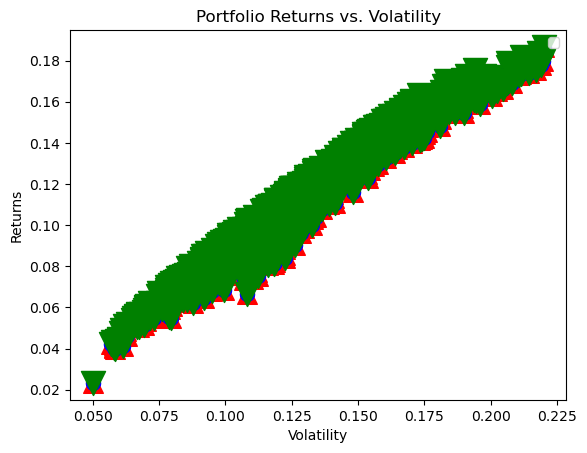

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(portdf['port_volatility'], portdf['port_returns'], marker='o', c='blue', s=100)
ax.set_title('Portfolio Returns vs. Volatility')

ax.set_xlabel('Volatility')
ax.set_ylabel('Returns')

ax.legend()

# Add different colors, markers, and sizes to the data points
ax.scatter(portdf['port_volatility'], portdf['port_returns'], marker='^', c='red', s=200, label='High Return')
ax.scatter(portdf['port_volatility'], portdf['port_returns'], marker='o', c='blue', s=100, label='Medium Return')
ax.scatter(portdf['port_volatility'], portdf['port_returns'], marker='v', c='green', s=300, label='Low Return')

plt.show()